In [44]:
# for numerical analysis and data processing
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# for Machine learning algorithms
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial.distance import cdist

# for vizualizations
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# IMPORT THE DATA SET

In [10]:
df = df = pd.read_csv("Cleaned_loan.csv", low_memory =False)
min_rate= df['int_rate'].min()
max_rate= df['int_rate'].max()
print(min_rate, max_rate, max_rate- min_rate)

5.32 28.99 23.669999999999998


# Preparing the dataset
Normalizing the data

Normalize the data set for ease of calculations so that all features have values between 0 and 1.

In [15]:
df_max = df.max()
df_min = df.min()

df=(df-df.min())/(df.max()-df.min())

Randomizing the data

Randomize the dataset so that any ordered patterns dont influence the prediction. (We have already skipped date as an influencing factor)

In [16]:
df = df.iloc[np.random.permutation(len(df))]

# Train-test split
The data is split into training and testing data. x represents the input features whereas y represents the output i.e. the interest rate.As a rule of thumb, we split the data into 80% training data and 20% testing or validation data.

In [17]:
y = df.iloc[:,df.columns.isin(["int_rate"])]
x = df.loc[:,~df.columns.isin(["int_rate"])]

total_samples=len(df)
split = 0.8

x_train = x[0:int(total_samples*split)]
x_test = x[int(total_samples*split):total_samples]
y_train = y[0:int(total_samples*split)]
y_test = y[int(total_samples*split):total_samples]

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    Calculates mean absolute error of the true and predicted values.
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

def view_metrics(y_test, predictions, algorithm, samples, total_samples):
    '''
    Plots the true and predicted values and prints RMS, MAE and MAPE metrics.
    '''
    fig = plt.figure(figsize=(18,5))
    plt.scatter(x=[i for i in range(samples)], y=[x for x in predictions[0:samples]], label='Predicted values')
    plt.scatter(x=[i for i in range(samples)], y=[x[0] for x in y_test.values[0:samples]], label='True values')
    plt.title('True and Predicted values for test dataset - %s' % algorithm)
    plt.legend()
    plt.show()
    
#     fig = plt.figure(figsize=(18,5))
#     plt.scatter(x=[i for i in range(total_samples)], y=[x for x in predictions], label='Predicted values')
#     plt.scatter(x=[i for i in range(total_samples)], y=[x[0] for x in y_test.values], label='True values')
#     plt.title('True and Predicted values for test dataset - %s' % algorithm)
#     plt.legend()
#     plt.show()

    RMS =  np.sqrt(mean_squared_error(y_test, predictions, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error", MAE) 
    print("Mean Absolute Percentage Error", MAPE)
    return RMS, MAE, MAPE

# MACHINE LEARNING MODELS

# 1. Linear Regression

In [19]:
lin_reg_model = LinearRegression() # build model
lin_reg_model= lin_reg_model.fit(x_train, y_train) # train model
R2 = lin_reg_model.score(x_train, y_train) # coefficient of determination
print(lin_reg_model.coef_)

[[-9.00608679e-03 -6.84793514e-02 -2.90468168e-01 -3.18318134e-01
   3.27469152e-01  5.28721036e-02  3.84966186e-01  7.26303452e-01
   5.86089486e-04  6.06994191e-03 -3.07808508e-01  1.14295249e-02
   2.08282410e-03  3.43571087e-03  1.32996434e-02  1.19191706e-03
   9.77948692e-01  5.96415829e-02  8.11929571e-02  8.63117165e-04
   6.19573150e-03  3.50924591e-02  7.19608183e-02 -4.67239980e-01
   2.53509888e-01 -4.10391421e-02  2.11993772e+00 -2.12367212e+00
  -2.99478942e-01  1.88057189e-01  1.67304593e-01  1.71359743e-01
  -1.43671518e-01  6.98866727e-02  4.23265025e-02  1.95778947e-02
  -4.45758092e-02  4.65179284e-02  8.81704774e-02  1.16006117e+00
   8.60435343e-02  7.44948820e-03 -1.45475262e-02  4.09656866e-02
   9.23533054e-03 -5.08277547e-03 -5.57809965e-03 -3.56858461e-03
   1.43007625e-02  3.12559272e-02 -3.47262724e-03  1.05991724e-02
   6.19596589e-01  1.03087905e-03  2.68298595e-04  3.22853358e-02]]


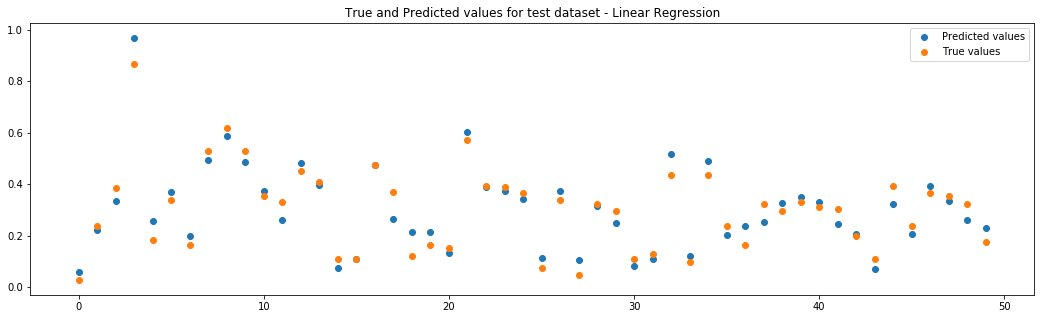

Root Mean Squared Error: [0.04629364]
Mean Absolute Error [0.0371045]
Mean Absolute Percentage Error [20.36769279]


In [20]:
lin_reg_model_predictions = lin_reg_model.predict(x_test) # make predictions
lin_reg_model_metrics = view_metrics(y_test, lin_reg_model_predictions,'Linear Regression', samples = 50, total_samples=2000)
## If predicted value is same as true value, the points will be overlapping. Closer the points, better is the prediction.

# 2. Random Forest

In [31]:
rand_forest_model = RandomForestRegressor(n_estimators=20 ,random_state=0) # build model
rand_forest_model = rand_forest_model.fit(x_train, y_train.values.ravel()) # train model
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0,  n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
feature_importance = rand_forest_model.feature_importances_
R2 = rand_forest_model.score(x_train, y_train) # coefficient of determination
rand_forest_model_predictions = rand_forest_model.predict(x_test) # make predictions

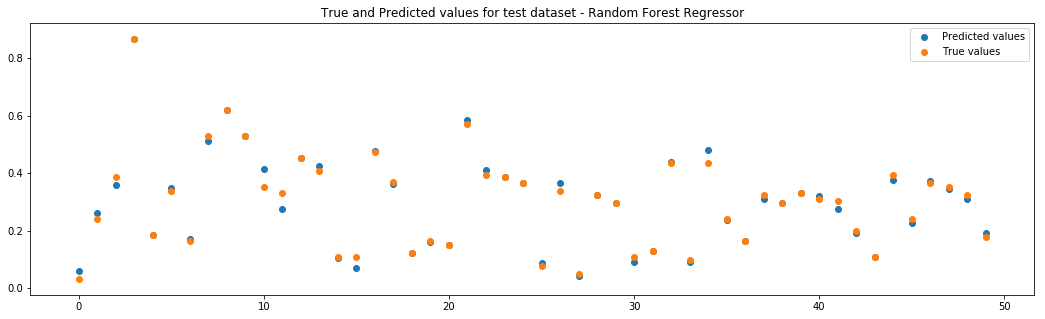

Root Mean Squared Error: [0.02228748]
Mean Absolute Error [0.01424038]
Mean Absolute Percentage Error [7.44636977]


In [32]:
rand_forest_model_metrics = view_metrics(y_test, rand_forest_model_predictions,'Random Forest Regressor', samples = 50, total_samples=2000)

In [34]:
#[estimator.tree_.max_depth for estimator in rand_forest_model.estimators_]
n_estimators = rand_forest_model.estimators_
n_estimators

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=209652396, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=398764591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=924231285, splitter='best'),
 DecisionTreeRegressor

# 3. Artificial Neural Network

In [25]:
nn_model = MLPRegressor(hidden_layer_sizes=(10,4),
                                    activation='relu', # activation function in the nodes of the neral net
                                    solver='adam', # optimizer algorithm
                                    learning_rate='constant',
                                    learning_rate_init=0.001, # initial learning rate
                                    max_iter=300, # max iterations to train for
                                    tol = -1, # tolerance for when to stop training should be range 0.001 to 0.0000001, -1 for max_iter
                                    shuffle=True,
                                    verbose=True) # show details at each iteration
nn_model = nn_model.fit(x_train, y_train.values.ravel())

Iteration 1, loss = 0.00156291
Iteration 2, loss = 0.00093888
Iteration 3, loss = 0.00085470
Iteration 4, loss = 0.00077434
Iteration 5, loss = 0.00072570
Iteration 6, loss = 0.00069599
Iteration 7, loss = 0.00058607
Iteration 8, loss = 0.00048630
Iteration 9, loss = 0.00045844
Iteration 10, loss = 0.00044591
Iteration 11, loss = 0.00044050
Iteration 12, loss = 0.00043610
Iteration 13, loss = 0.00043152
Iteration 14, loss = 0.00043013
Iteration 15, loss = 0.00042752
Iteration 16, loss = 0.00042641
Iteration 17, loss = 0.00042420
Iteration 18, loss = 0.00042269
Iteration 19, loss = 0.00041758
Iteration 20, loss = 0.00041041
Iteration 21, loss = 0.00040167
Iteration 22, loss = 0.00039725
Iteration 23, loss = 0.00039688
Iteration 24, loss = 0.00039342
Iteration 25, loss = 0.00039272
Iteration 26, loss = 0.00039278
Iteration 27, loss = 0.00039244
Iteration 28, loss = 0.00039106
Iteration 29, loss = 0.00039070
Iteration 30, loss = 0.00038967
Iteration 31, loss = 0.00038888
Iteration 32, los

Iteration 253, loss = 0.00019018
Iteration 254, loss = 0.00019030
Iteration 255, loss = 0.00018943
Iteration 256, loss = 0.00018943
Iteration 257, loss = 0.00018929
Iteration 258, loss = 0.00018996
Iteration 259, loss = 0.00018919
Iteration 260, loss = 0.00018892
Iteration 261, loss = 0.00018965
Iteration 262, loss = 0.00018952
Iteration 263, loss = 0.00018927
Iteration 264, loss = 0.00018915
Iteration 265, loss = 0.00018882
Iteration 266, loss = 0.00018933
Iteration 267, loss = 0.00018925
Iteration 268, loss = 0.00018875
Iteration 269, loss = 0.00018841
Iteration 270, loss = 0.00018899
Iteration 271, loss = 0.00018824
Iteration 272, loss = 0.00018871
Iteration 273, loss = 0.00018933
Iteration 274, loss = 0.00018814
Iteration 275, loss = 0.00018865
Iteration 276, loss = 0.00018866
Iteration 277, loss = 0.00018793
Iteration 278, loss = 0.00018805
Iteration 279, loss = 0.00018905
Iteration 280, loss = 0.00018787
Iteration 281, loss = 0.00018877
Iteration 282, loss = 0.00018802
Iteration 

C:\Users\bhavy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


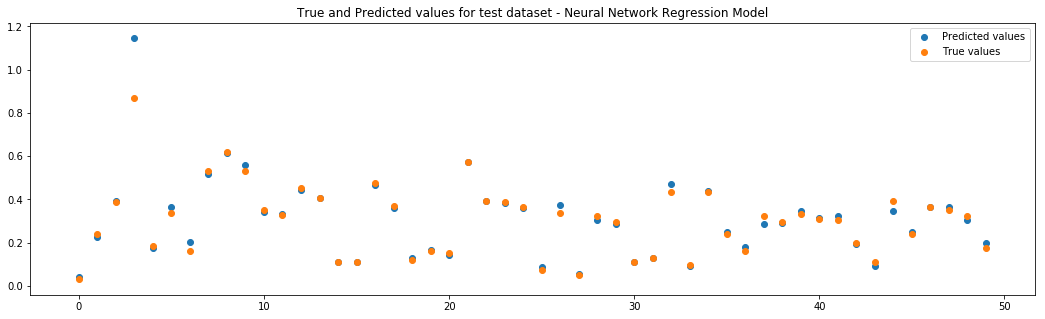

Root Mean Squared Error: [0.01850547]
Mean Absolute Error [0.0133102]
Mean Absolute Percentage Error [6.70938937]


In [26]:
nn_model_predictions = nn_model.predict(x_test)
nn_model_metrics = view_metrics(y_test, nn_model_predictions,'Neural Network Regression Model', samples = 50, total_samples=2000)

# Model Comparison

In [35]:
print("%10s | %7s | %7s | %7s" % ('MODEL', 'RMSE', 'MAE', 'MAPE'))
print('___________________________________________')
for name,metrics in zip(['LIN_REG','RAND_FRST','NN'],[lin_reg_model_metrics, rand_forest_model_metrics, nn_model_metrics]):
    print ("%10s | %.5f | %.5f | %.5f %%" % (name, metrics[0][0], metrics[1][0], metrics[2][0]))
print()
#print('Note: Lower values are better')

     MODEL |    RMSE |     MAE |    MAPE
___________________________________________
   LIN_REG | 0.04629 | 0.03710 | 20.36769 %
 RAND_FRST | 0.02229 | 0.01424 | 7.44637 %
        NN | 0.01851 | 0.01331 | 6.70939 %



# Predicting interest rates

In [28]:
#returns the predicted value multiplied by the range
def get_interest_rate(model, features):
    return (model.predict(features))*(max_rate-min_rate) + min_rate

In [29]:
sample = x_test[2:3] # substitute with the input you want to predict the rate for
interest_rate = get_interest_rate(rand_forest_model, sample)
print('Predicted interest rate is:', interest_rate)
print('for the following user profile:')
sample

Predicted interest rate is: [13.16302049]
for the following user profile:


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
494997,0.55782,0.968446,0.565217,0.565217,0.571429,0.0,0.470391,0.333333,0.9,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00125,0.0,0.0,0.111111


# Model Performance with 5-Fold Cross Validation - Linear Regression

K-Fold CV splits given data into a K number of sections/folds where each fold is used as a testing set at some point.

Here, the data set is split into 5 folds. 

In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

Train Index:  [177476 177477 177478 ... 887376 887377 887378] 

Test Index:  [     0      1      2 ... 177473 177474 177475]


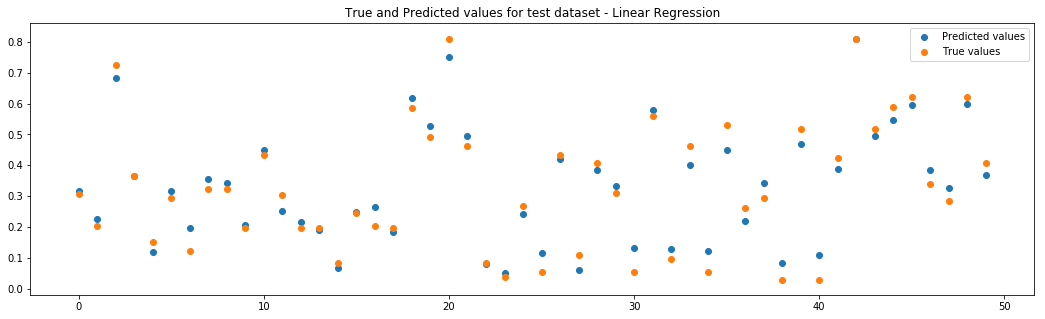

Root Mean Squared Error: [0.04635371]
Mean Absolute Error [0.03728547]
Mean Absolute Percentage Error [20.2590529]
Train Index:  [     0      1      2 ... 887376 887377 887378] 

Test Index:  [177476 177477 177478 ... 354949 354950 354951]


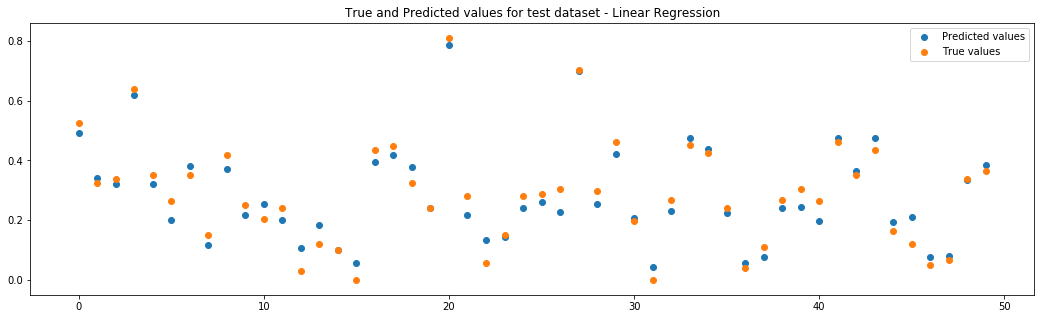

Root Mean Squared Error: [0.04619486]
Mean Absolute Error [0.03711851]
Mean Absolute Percentage Error [20.36431381]
Train Index:  [     0      1      2 ... 887376 887377 887378] 

Test Index:  [354952 354953 354954 ... 532425 532426 532427]


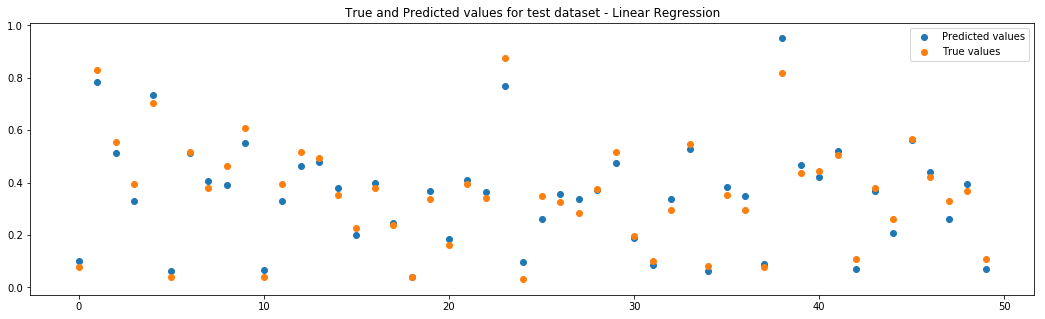

Root Mean Squared Error: [0.04637321]
Mean Absolute Error [0.03725379]
Mean Absolute Percentage Error [20.37376842]
Train Index:  [     0      1      2 ... 887376 887377 887378] 

Test Index:  [532428 532429 532430 ... 709901 709902 709903]


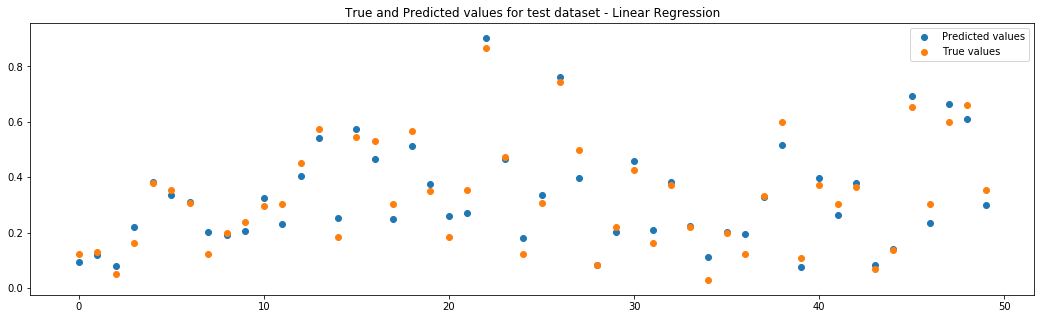

Root Mean Squared Error: [0.04631994]
Mean Absolute Error [0.03717904]
Mean Absolute Percentage Error [20.51799778]
Train Index:  [     0      1      2 ... 709901 709902 709903] 

Test Index:  [709904 709905 709906 ... 887376 887377 887378]


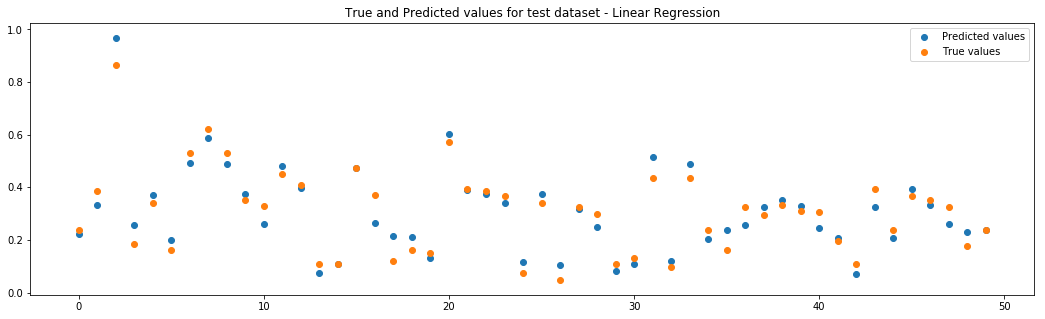

Root Mean Squared Error: [0.04629373]
Mean Absolute Error [0.03710454]
Mean Absolute Percentage Error [20.36722618]


In [65]:
from sklearn.model_selection import KFold

scores = []

y = df.iloc[:,df.columns.isin(["int_rate"])]
x = df.loc[:,~df.columns.isin(["int_rate"])]

cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lin_reg_model.fit(X_train, y_train)
    scores.append(lin_reg_model.score(X_test, y_test))
    lin_reg_model_predictions = lin_reg_model.predict(X_test) # make predictions
    lin_reg_model_metrics = view_metrics(y_test, lin_reg_model_predictions,'Linear Regression', samples = 50, total_samples=2000)



# Testing with custom input

In [ ]:
#returns the predicted value multiplied by the range
def get_interest_rate(model, features):
    return (model.predict(features))*(max_rate-min_rate) + min_rate
df = pd.read_csv("train_loan.csv", low_memory =False)
x_test = df.as_matrix()
sample = df.iloc[:] # substitute with the input you want to predict the rate for
interest_rate = get_interest_rate(rand_forest_model, sample)
print('Predicted interest rate is:', interest_rate)
print('for the following user profile:')
sample